
### Vamos a trabajar con un dataset sobre datos economicos recabados de la pagina del Banco Mundial 
*(http://pip.worldbank.org)*

Para terminar con este dataset se trabajó en cuanto a los proceos de EDA, por seperado, en cada dataset de forma individual y luego se unificaron (MERGE) los mismos teniendo en cuneta la variable clave de la **## columna/variable** 'PAISES'.

### Los dataset que se trabajaron fueron:

*Índice de Pobreza*: (https://datos.bancomundial.org/indicador/SI.POV.DDAY?locations=1W&start=1981&end=2015&view=chart) // Porcentaje de la población que vive por debajo de $2,15 por día.

*Porcentaje de Desempleo:* (https://datos.bancomundial.org/indicador/SL.UEM.TOTL.NE.ZS?end=2015&locations=1W&start=1981&view=chart) // Porcentaje de la fuerza laboral que está desempleada.

*Acceso a la Electricidad:*(https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS) // Porcentaje de la población con acceso a electricidad.

*Porcentaje del PIB en Educación:*(https://datos.bancomundial.org/indicator/SE.XPD.TOTL.GB.ZS) // Porcentaje del Producto Interno Bruto dedicado a la educación.


##### La hipotesis de trabajo aqui es buscar la posibilidad de predecir el Porcentaje de Pobreza(variable dependiente), en relacion a Porcentaje de Desempleo, Acceso a Electricidad, Porcentaje del PBI destinado a la Educación (variables independientes)



In [219]:
#Importamos librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [220]:
#Se trae el dataset a utilizar
df_world = pd.read_csv("datos_economicos_mundiales_procesados.csv")
df_world

,Unnamed: 0,Paises,Ingresos,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023,cluster
0,0,Angola,Ingreso mediano alto,22.366667,14.620,74.933333,7.726000,3
1,1,Albania,Países de ingreso bajo,0.372727,11.584,100.000000,9.833778,0
2,2,Argentina,Países de ingreso mediano bajo,2.539130,6.178,100.000000,12.284900,0
3,3,Armenia,Países de ingreso mediano bajo,3.043478,8.586,99.966667,9.684984,0
4,4,Australia,Países de ingreso bajo,0.575000,3.667,100.000000,13.545044,0
5,5,Austria,Ingreso mediano alto,0.409524,5.243,100.000000,8.894330,0
6,6,Burundi,Países de ingreso mediano bajo,66.333333,0.930,62.433333,20.537999,1
7,7,Benin,Países de ingreso bajo,38.180000,1.452,68.066667,19.042999,1
8,8,Burkina Faso,Ingreso mediano alto,40.680000,5.293,64.733333,20.297001,1
9,9,Bangladesh,Países de ingreso mediano bajo,18.800000,5.060,99.166667,12.012000,0


In [221]:
df_world.columns

Index(['Unnamed: 0', 'Paises', 'Ingresos', 'Indice de Pobreza 2023',
       'Porcentaje de Desempleo 2023',
       'Porcentaje de Acceso a Electricidad 2023', 'Gasto Público 2023',
       'cluster'],
      dtype='object')

In [222]:
#Se puede apreciar que hay un error en el dataset que la columna con los ID este duplicada
#Se procede a eliminar
df_world.drop(columns=['Unnamed: 0'], inplace= True)
#Chequeamos
df_world

,Paises,Ingresos,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023,cluster
0,Angola,Ingreso mediano alto,22.366667,14.620,74.933333,7.726000,3
1,Albania,Países de ingreso bajo,0.372727,11.584,100.000000,9.833778,0
2,Argentina,Países de ingreso mediano bajo,2.539130,6.178,100.000000,12.284900,0
3,Armenia,Países de ingreso mediano bajo,3.043478,8.586,99.966667,9.684984,0
4,Australia,Países de ingreso bajo,0.575000,3.667,100.000000,13.545044,0
5,Austria,Ingreso mediano alto,0.409524,5.243,100.000000,8.894330,0
6,Burundi,Países de ingreso mediano bajo,66.333333,0.930,62.433333,20.537999,1
7,Benin,Países de ingreso bajo,38.180000,1.452,68.066667,19.042999,1
8,Burkina Faso,Ingreso mediano alto,40.680000,5.293,64.733333,20.297001,1
9,Bangladesh,Países de ingreso mediano bajo,18.800000,5.060,99.166667,12.012000,0


### *Sweetviz para hacer un rapido analisis EDA como forma de familiarizarse con el datset


In [223]:
!pip install sweetviz


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [224]:
import sweetviz as sv
#analiza el datset
report= sv.analyze(df_world)

                                             |          | [  0%]   00:00 -> (? left)


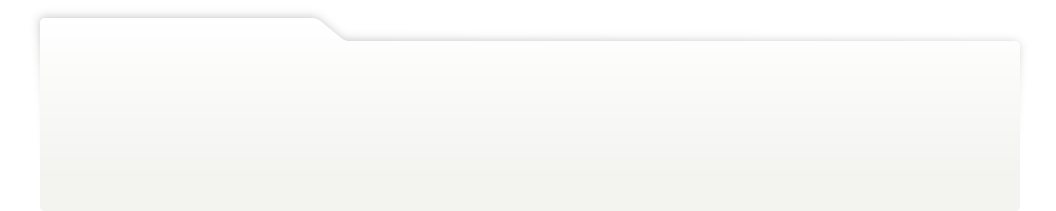
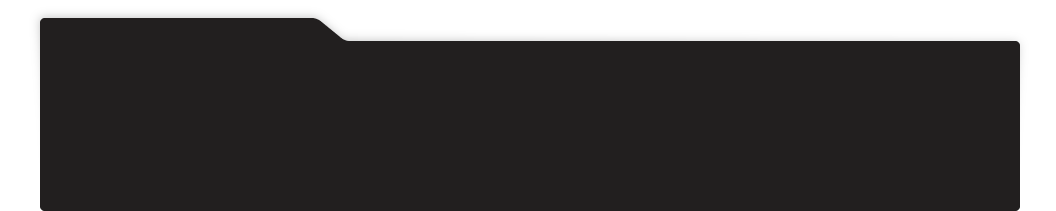
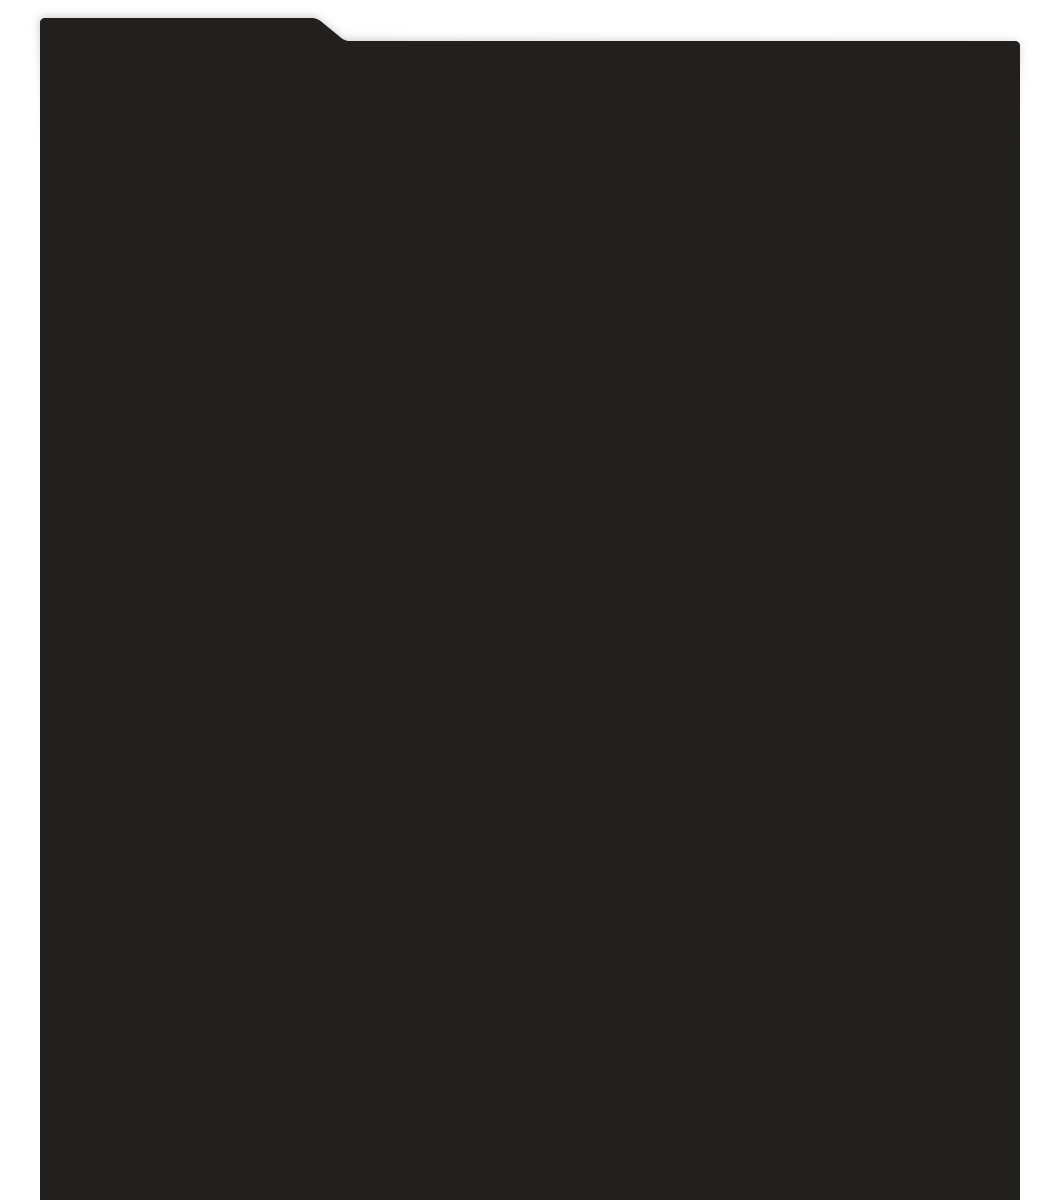
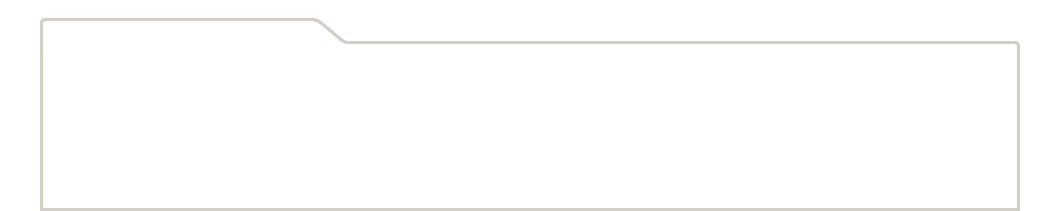
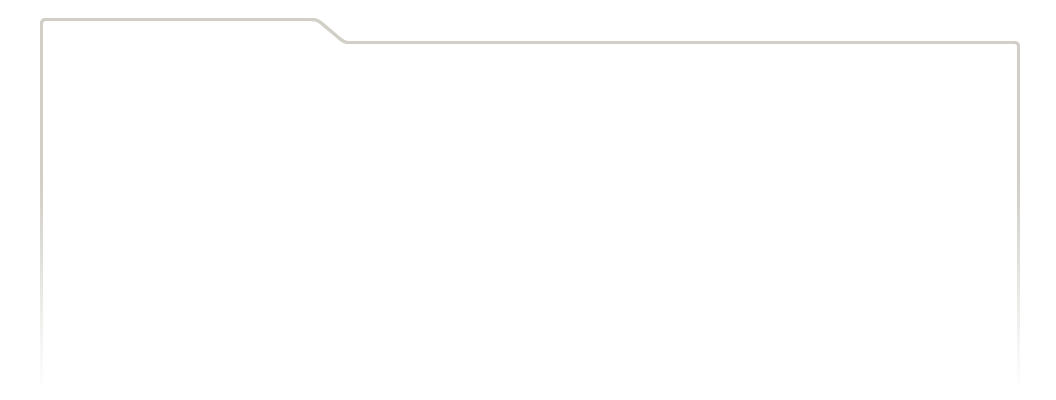
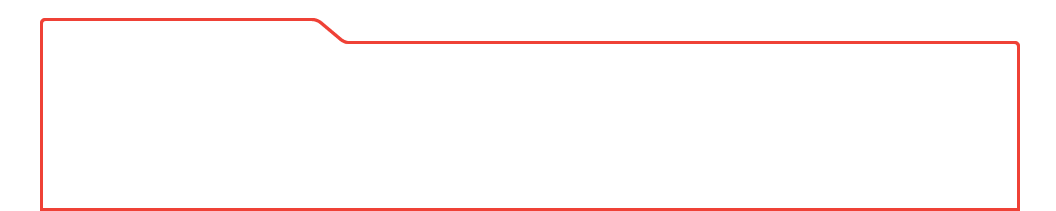
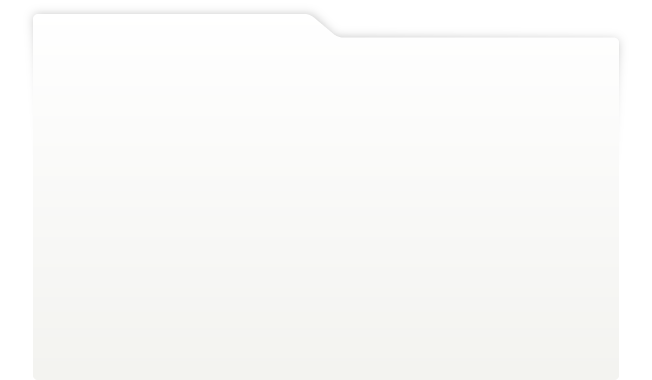
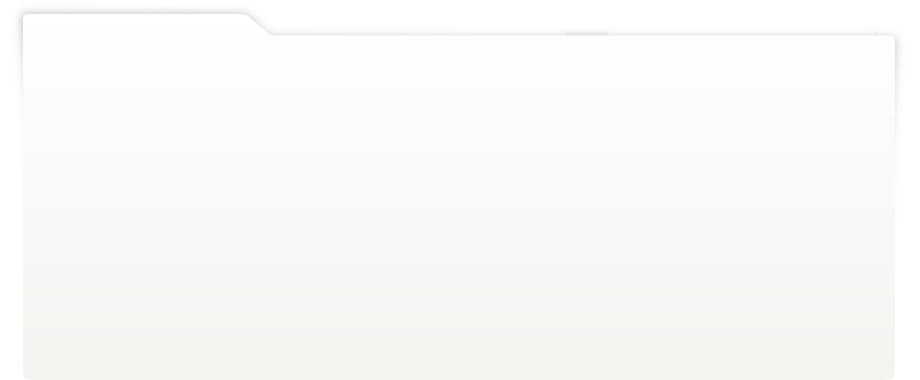
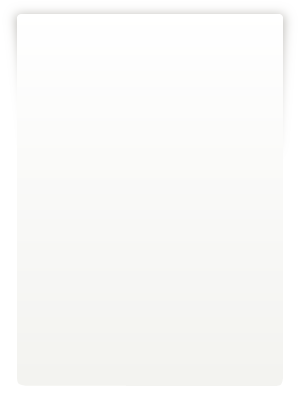
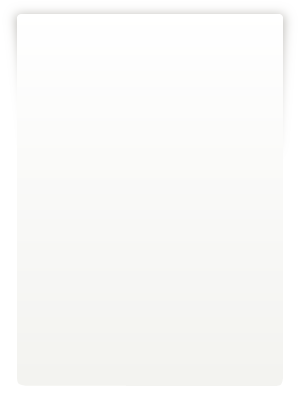
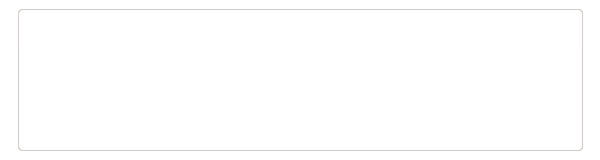
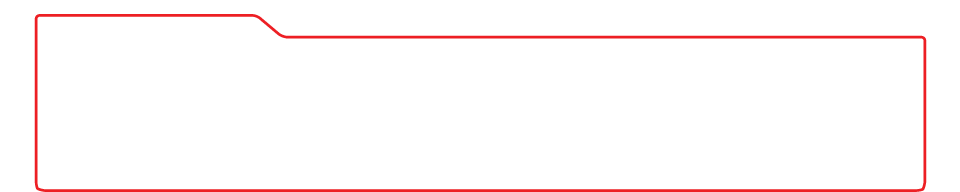
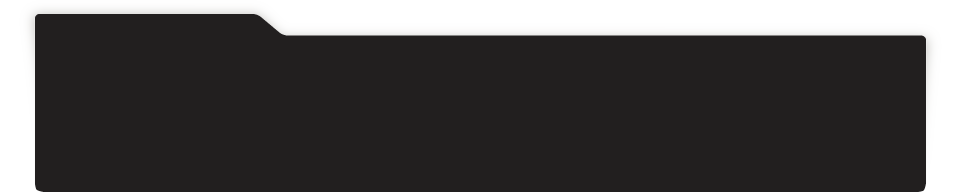
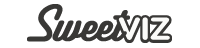
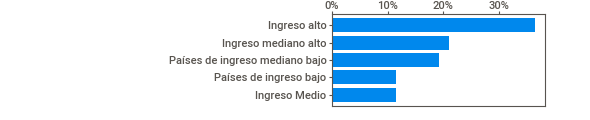
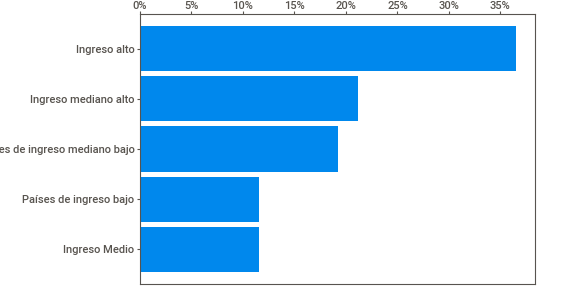
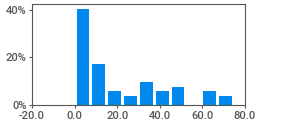
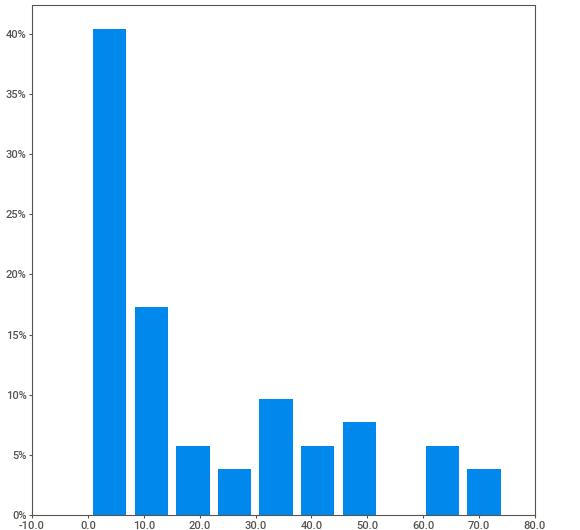
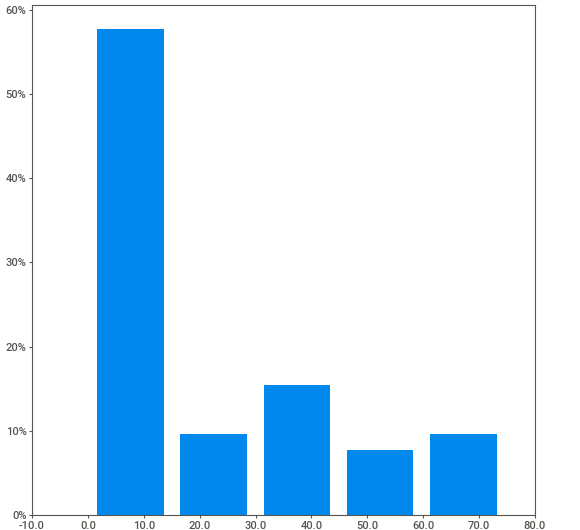
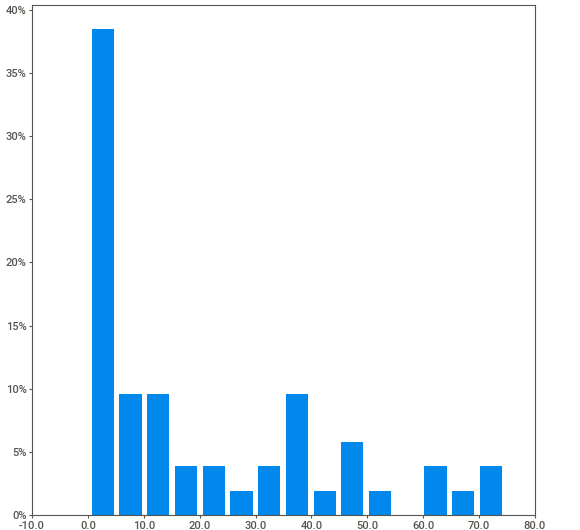
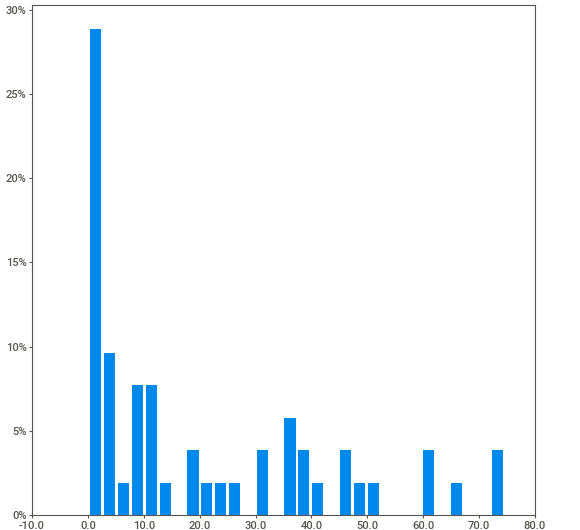
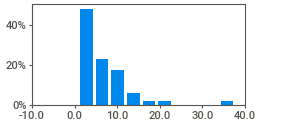
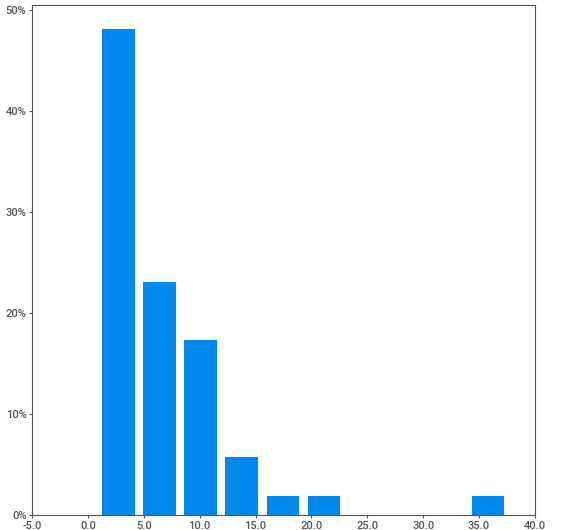
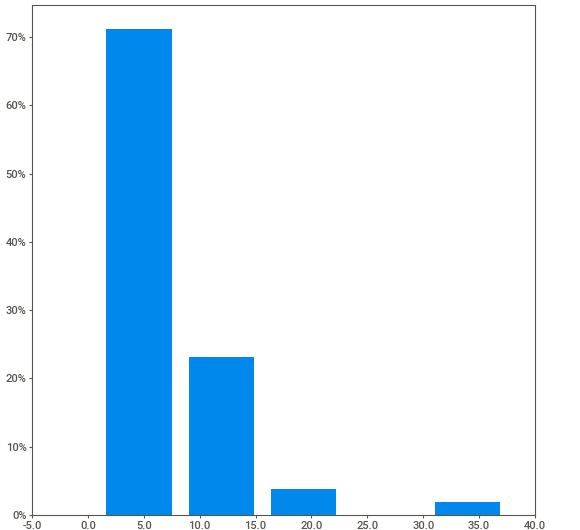
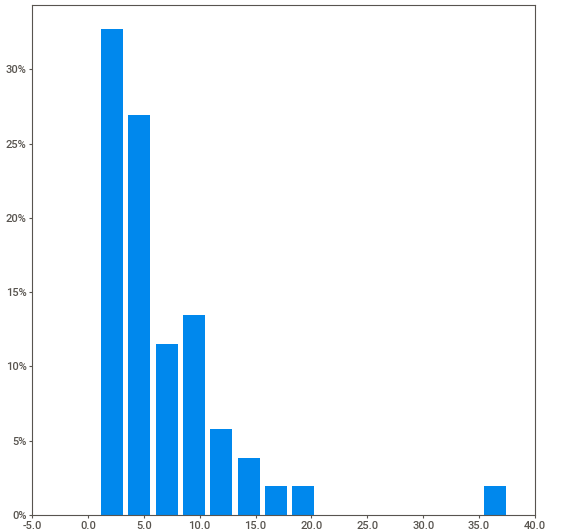
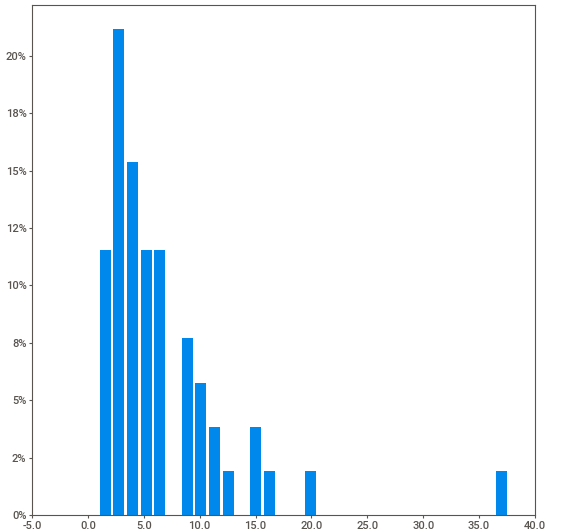
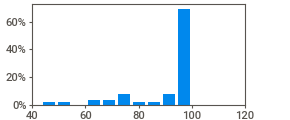
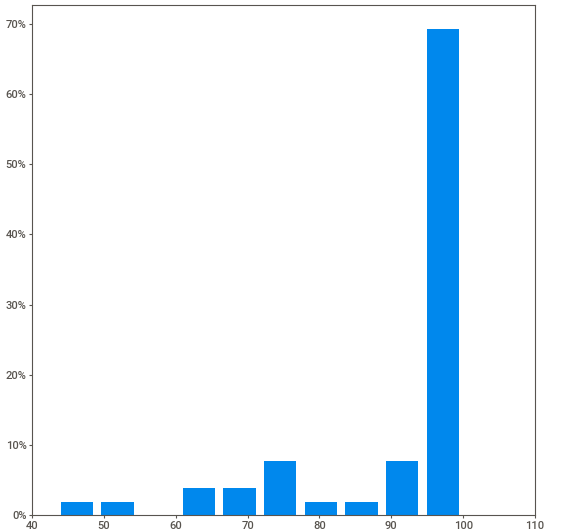
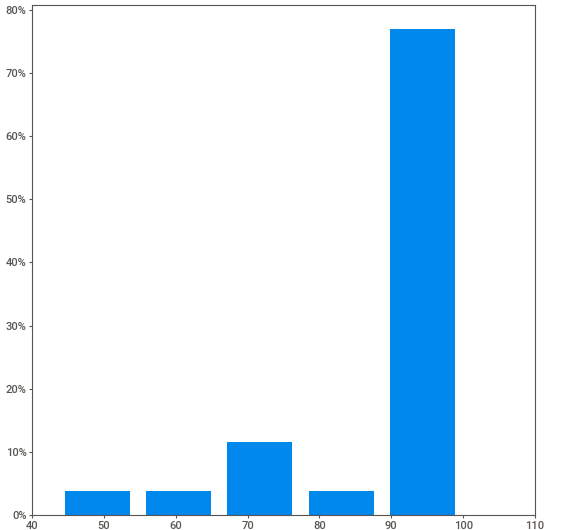
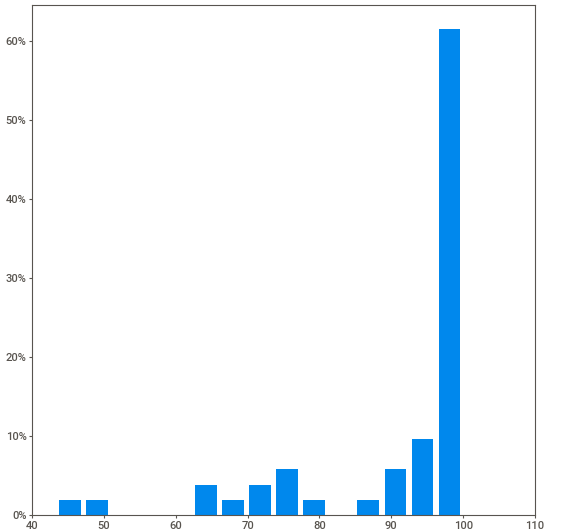
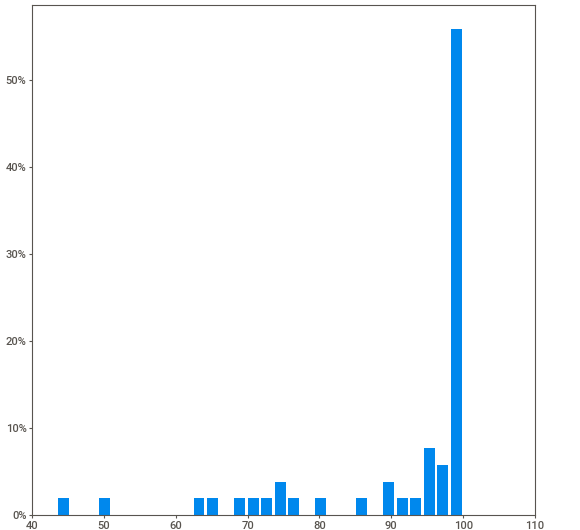
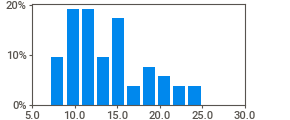
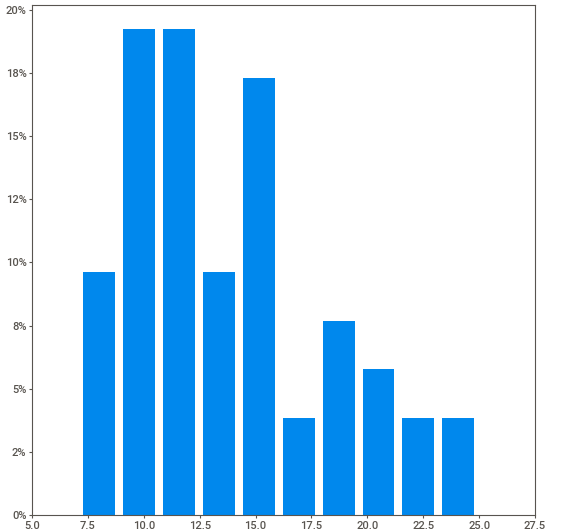
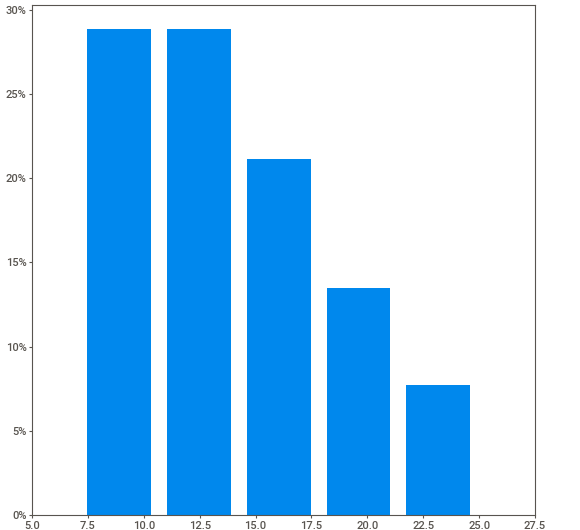
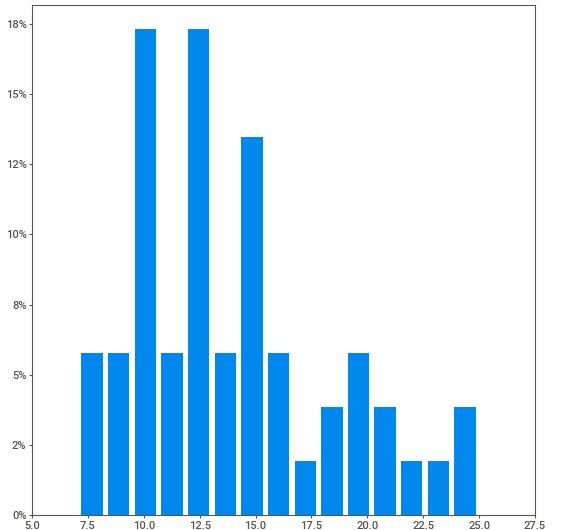
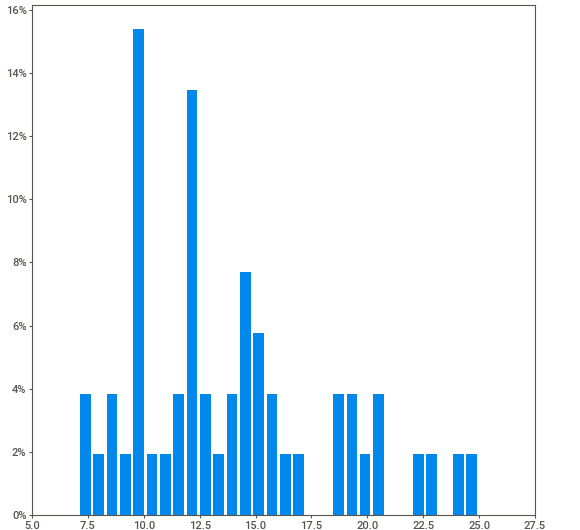
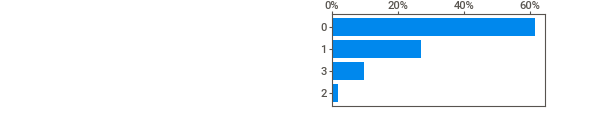
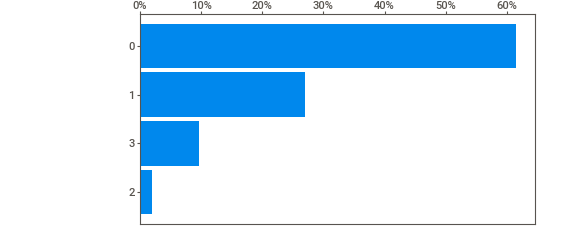
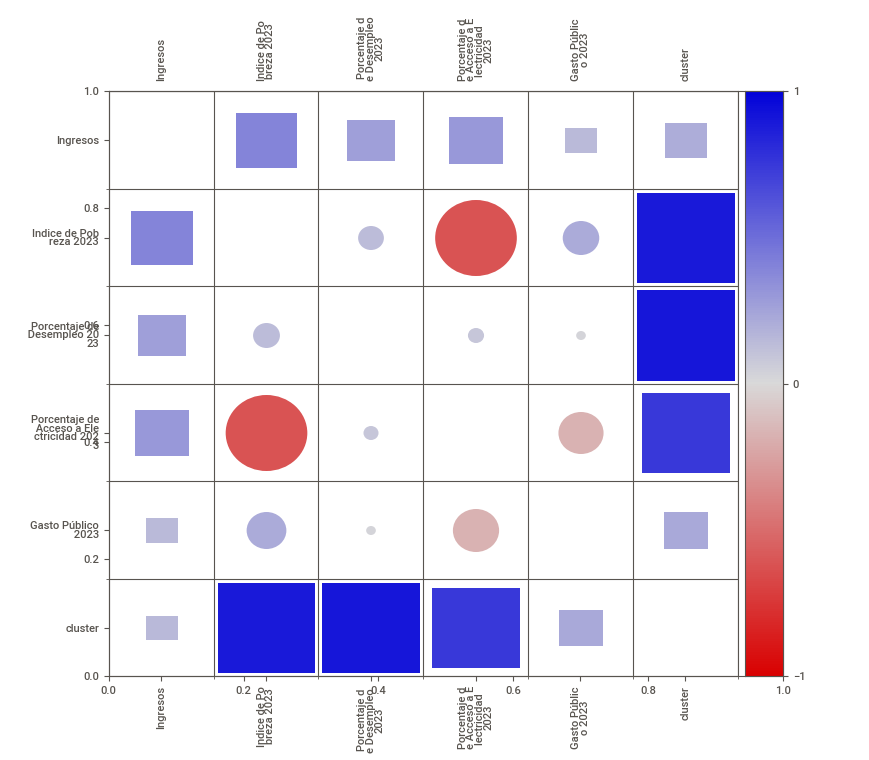
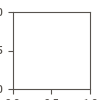

In [225]:
#Accedemos al reporte
report.show_notebook()

In [226]:
#Guardamos el reporte en formato html
report.show_html('df_world.html')

Report df_world.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Eliminamos la variable cluster que no tiene relacion con el analisis que vamos a realizar

In [227]:
df_world.drop('cluster', axis=1,inplace=True)

In [228]:
df_world.head()

,Paises,Ingresos,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023
0,Angola,Ingreso mediano alto,22.366667,14.620,74.933333,7.726000
1,Albania,Países de ingreso bajo,0.372727,11.584,100.000000,9.833778
2,Argentina,Países de ingreso mediano bajo,2.539130,6.178,100.000000,12.284900
3,Armenia,Países de ingreso mediano bajo,3.043478,8.586,99.966667,9.684984
4,Australia,Países de ingreso bajo,0.575000,3.667,100.000000,13.545044


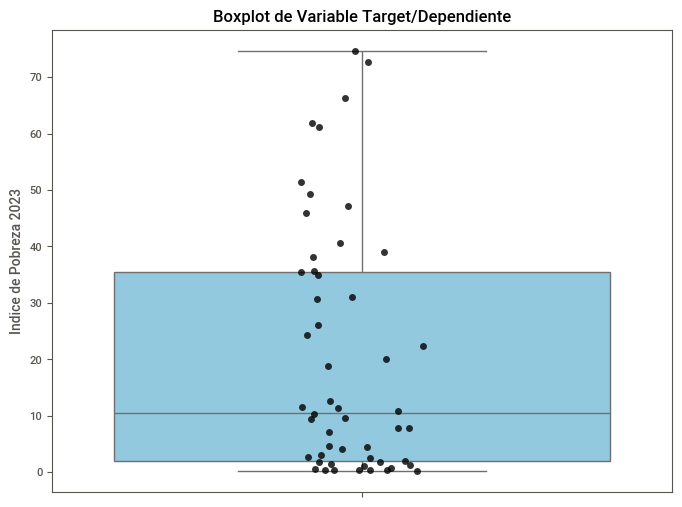

In [229]:
#Hacemos un boxplot para poder visualizar los outliers de nuestra variable target

plt.figure(figsize=(8,6))
sns.boxplot(y=df_world['Indice de Pobreza 2023'],color='skyblue',whis=2)
boxplot = sns.stripplot(y="Indice de Pobreza 2023", data=df_world, marker="o", alpha=0.8, color="black")
plt.title('Boxplot de Variable Target/Dependiente')
plt.ylabel='Valores'
plt.show()

#Cada puntito representa los paises en relacion con su Indice de Pobreza

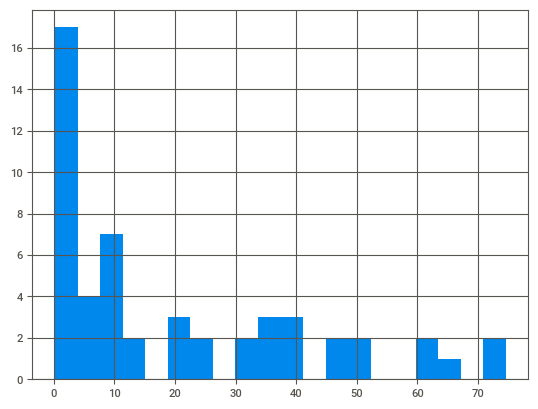

In [230]:
df_world['Indice de Pobreza 2023'].hist(bins=20)
plt.show()

#### Lo que debemos tener en cuenta es que hay muchos paises con porcentaje de pobreza menos al 15% aproximandamente y hay unos pocos paises con un porcentaje de pobreza que supera el 70% estos se podrian considerar como valores atípicos

#### Como vamos a realizar un regresion multiple, las columnas con valores NO numericos dificultan el proceso
### Por ello y solo con el proposito de realmente ver si hay alguna correlacion entre las variables, elimino dichas columnas


In [231]:
#Eliminamos

columnas_eliminar=["Paises","Ingresos"]
df_world_numerico = df_world.drop(columnas_eliminar,axis=1)
df_world_numerico.head()



,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023
0,22.366667,14.620,74.933333,7.726000
1,0.372727,11.584,100.000000,9.833778
2,2.539130,6.178,100.000000,12.284900
3,3.043478,8.586,99.966667,9.684984
4,0.575000,3.667,100.000000,13.545044


### Creamos las particiones de test y train

In [232]:
#Creamos las particiones

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_world_numerico, test_size=0.4, random_state=42)

In [233]:
#Vemos de cuantos elementos esta conformado el training set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 15 to 38
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Indice de Pobreza 2023                    31 non-null     float64
 1   Porcentaje de Desempleo 2023              31 non-null     float64
 2   Porcentaje de Acceso a Electricidad 2023  31 non-null     float64
 3   Gasto Público 2023                        31 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [234]:
#Vemos de cuantos elementos esta conformado el test set
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 19 to 49
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Indice de Pobreza 2023                    21 non-null     float64
 1   Porcentaje de Desempleo 2023              21 non-null     float64
 2   Porcentaje de Acceso a Electricidad 2023  21 non-null     float64
 3   Gasto Público 2023                        21 non-null     float64
dtypes: float64(4)
memory usage: 840.0 bytes


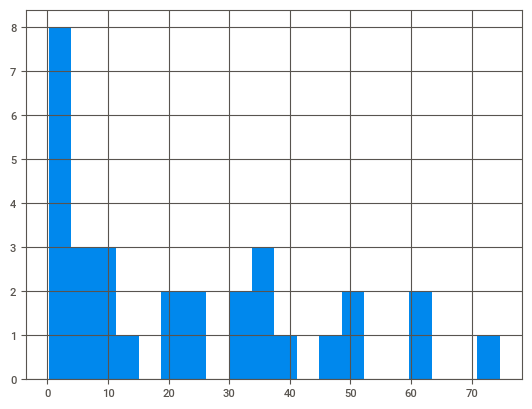

In [235]:
#visualizamos la variable dependiente(Indice Pobreza 2023) de ambas particiones de datos
train_set['Indice de Pobreza 2023'].hist(bins=20)
plt.show()

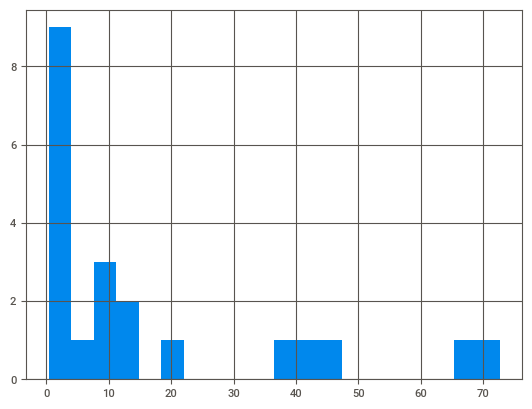

In [236]:
test_set['Indice de Pobreza 2023'].hist(bins=20)
plt.show()

Tambien podriamos ver si una transformacion logaritimica cambia (corrige) la distribucion de la variable

In [237]:

from sklearn.preprocessing import MinMaxScaler

#defino la funcion que aplicara la funcion logaritmica

def apply_log(column, scaling=True):
  data = column
  if scaling:
    scaler = MinMaxScaler() # Primero aplicamos escalado al rango [0,1]
    data = scaler.fit_transform(column.values.reshape(-1, 1))

  log_variable = np.log(data+1)

  return pd.DataFrame(log_variable, columns=[column.name])

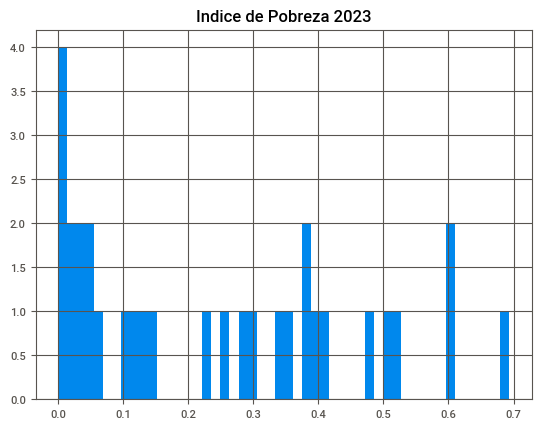

In [238]:
#aplicamos la funcion
log_col = apply_log(train_set['Indice de Pobreza 2023'])
log_col.hist(bins=50)
plt.show()

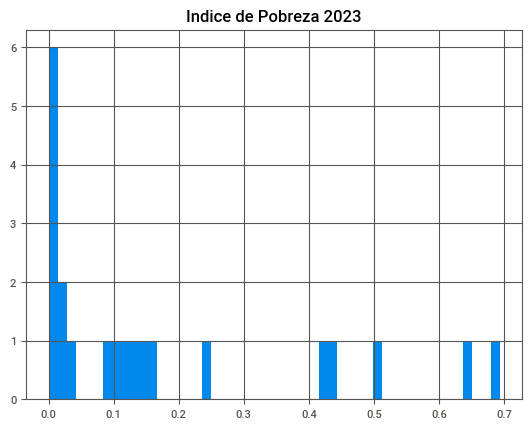

In [239]:
#aplicamos la funcion
log_col = apply_log(test_set['Indice de Pobreza 2023'])
log_col.hist(bins=50)
plt.show()

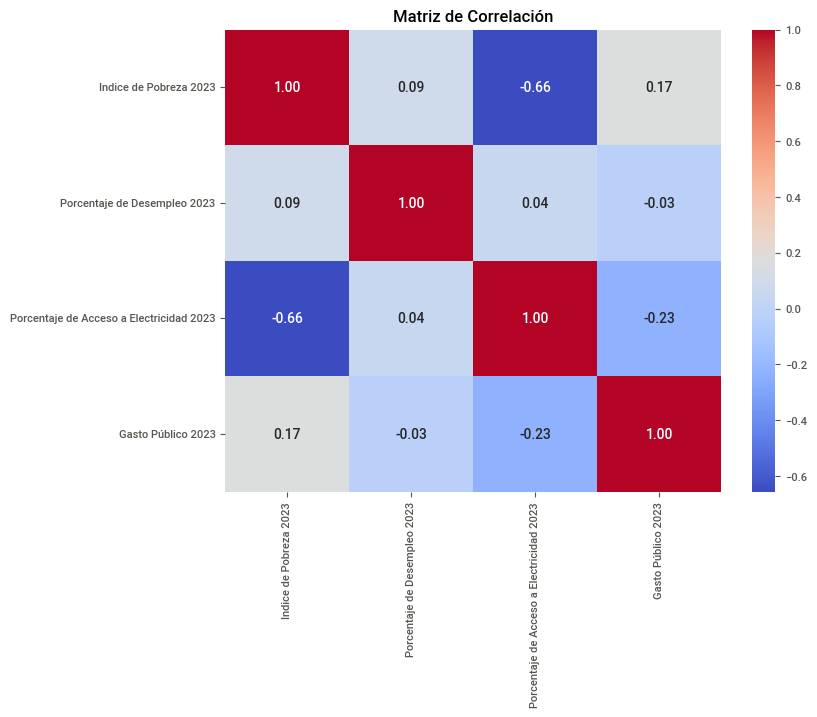

In [240]:
# Se Filtran solo las columnas numéricas del dataset
df_numerico = df_world.select_dtypes(include=['number'])

# Generar la matriz de correlación solo con las columnas numéricas
matriz_correlacion = df_numerico.corr()

# Visualizar la matriz de correlación con un heatMap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# **Seleccion de un modelo y entrenamiento**

In [241]:


X_train = train_set.drop("Indice de Pobreza 2023", axis=1)
#X_train = X_train[['longitude', 'latitude', 'median_income']]

# Separamos los valores a predecir (Y)
y_train = train_set["Indice de Pobreza 2023"].copy()

X_train.head()


,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023
15,8.304,99.900000,20.082457
9,5.060,99.166667,12.012000
16,3.367,99.900000,9.513235
30,3.061,72.200000,14.068000
36,10.685,95.366667,12.822029


In [242]:
y_train.head()

15     2.725000
9     18.800000
16     7.922727
30    74.600000
36    24.250000
Name: Indice de Pobreza 2023, dtype: float64

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 3.98373761e-01,  6.79041853e-01,  1.20695289e+00],
       [-2.85465835e-01,  6.20986626e-01, -4.13237438e-01],
       [-6.42352530e-01,  6.79041853e-01, -9.14878810e-01],
       [-7.06857744e-01, -1.51386239e+00, -4.83721778e-04],
       [ 9.00291788e-01,  3.20154997e-01, -2.50619475e-01],
       [-6.37714900e-01,  6.86958475e-01,  8.74712369e-01],
       [-7.02641717e-01,  6.84319601e-01,  1.82193271e+00],
       [ 1.72979512e+00, -1.29747473e+00, -1.27367652e+00],
       [-1.03107023e+00,  6.86958475e-01, -1.32486915e+00],
       [-7.32575510e-01, -3.30829668e+00, -3.28920020e-01],
       [-6.93366457e-01,  6.86958475e-01, -2.83360293e-01],
       [ 1.79556514e+00,  4.20432207e-01, -3.74692262e-01],
       [ 2.11766961e+00, -8.51505034e-01, -5.63804230e-01],
       [-9.20399517e-01,  3.38627114e-01,  1.51287709e-01],
       [ 1.08980221e+00,  6.86958475e-01, -8.50527910e-01],
       [-2.35505914e-01, -1.28453574e-01, -8.11737479e-01],
       [-4.97899201e-02,  6.86958475e-01

In [244]:
#Realizamos la regresion
from sklearn.linear_model import LinearRegression
lin_regresion = LinearRegression()
lin_regresion.fit(X_train,y_train)
#lin_regresion.fit(X_train_scaled,y_train)        #Fiteo los datos escalados y los otros datos

y_predict= lin_regresion.predict(X_train)
#y_predict= lin_regresion.predict(X_train_scaled) #Probamos con los datos escalados para comparar resultados


In [245]:
#Controlamos el desempeño del modelo
#Se importan las metricas 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Cómputo de R2 (sobre el conjunto de entrenamiento)

In [246]:
#Error cuadratico
r2 = r2_score(y_train,y_predict)
print("R2 del entrenamiento",r2)

R2 del entrenamiento 0.3530484840030689


Computo del RMSE para evaluar las predicciones (sobre el conjunto de entrenamiento)

In [247]:

lin_mse = mean_squared_error(y_train, y_predict)
print("Train RMSE=", np.sqrt(lin_mse))

Train RMSE= 17.08693407662372


Tambien se puede calcular el MAE

In [248]:
print("Train MAE=", mean_absolute_error(y_train, y_predict))

Train MAE= 14.073182785512268


Obtenemos los coeficientes

In [249]:
cdf = pd.DataFrame(lin_regresion.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
Porcentaje de Desempleo 2023,0.000745
Porcentaje de Acceso a Electricidad 2023,-0.981366
Gasto Público 2023,-0.460750


Computo del RSME y MAE sobre el conjunto de test (para ver la diferencia con el conjunto de entrenamiento)

In [250]:
X_test = test_set.drop("Indice de Pobreza 2023", axis=1)


# Separamos los valores a predecir (Y)
y_test = test_set["Indice de Pobreza 2023"].copy()

y_pred = lin_regresion.predict(X_test)




Controlamos metricas de error

In [251]:
r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
lin_mse = mean_squared_error(y_test, y_pred)
print("Test RMSE=", np.sqrt(lin_mse))
print("Test MAE=", mean_absolute_error(y_test, y_pred))

Test R2= 0.454183894563603
Test RMSE= 16.19195487418784
Test MAE= 13.854163619417367


#### Vemos la comparacion de las metricas entre el Set Entrenamiento y el Set de Testeo. ###
 
TRAIN (R2  0.3530484840030689)  ---->  TEST (R2= 0.454183894563603)
TRAIN (RMSE= 17.08693407662372) ---->  TEST (RMSE= 16.19195487418784)
TRAIN (MAE= 14.073182785512268) ---->  TEST (MAE= 13.854163619417367)

Métricas:
### R² (Coeficiente de Determinación):

El valor de R² indica qué proporción de la variabilidad de la variable dependiente está explicada por el modelo. Un valor de R² más cercano a 1 significa que el modelo explica bien los datos.
R² Entrenamiento = 0.353: Esto significa que el 35.3% de la variabilidad en los datos de entrenamiento es explicada por tu modelo.
R² Testeo = 0.454: Esto indica que el modelo explica el 45.4% de la variabilidad en los datos de testeo.
Interpretación de la diferencia: Curiosamente, el R² es mayor en el conjunto de testeo que en el de entrenamiento. Esto podría ser un indicio de que el modelo no está sobreajustado (overfitting) y generaliza bien en nuevos datos. 
Sin embargo, también puede ser simplemente una fluctuación por la selección del conjunto de datos; podría deberse a una división particular de los datos o a un comportamiento aleatorio que no siempre se repetirá en otras divisiones. *(Se probo con diferentes particiones y las metricas conservaron las mismas caracteristicas)*

### RMSE (Root Mean Squared Error o Error Cuadrático Medio):

El RMSE mide la desviación estándar de las predicciones respecto a los valores reales. Un RMSE más bajo indica un mejor rendimiento del modelo.
*RMSE Entrenamiento = 17.087:* Esto indica que en promedio, las predicciones del modelo tienen un error de aproximadamente 17 unidades en el conjunto de entrenamiento.
*RMSE Testeo = 16.192:* En el conjunto de testeo, el error promedio es de aproximadamente 16.2 unidades.
*Interpretación de la diferencia:* El RMSE es ligeramente más bajo en el conjunto de testeo, lo cual sugiere que el modelo está haciendo un mejor trabajo en predecir los datos de testeo en comparación con los datos de entrenamiento. Esto, nuevamente, refuerza la idea de que el modelo generaliza bien y no está sobreajustado.

### MAE (Mean Absolute Error o Error Absoluto Medio):

El MAE mide el error promedio entre las predicciones del modelo y los valores reales, pero a diferencia del RMSE, no eleva al cuadrado las diferencias, lo que lo hace menos sensible a los valores atípicos (outliers).
*MAE Entrenamiento = 14.073:* En promedio, el modelo se desvía en 14.1 unidades respecto a los valores reales en el conjunto de entrenamiento.
*MAE Testeo = 13.854:* En el conjunto de testeo, el error promedio es de 13.85 unidades.
El MAE también es ligeramente más bajo en el conjunto de testeo que en el de entrenamiento, lo que refuerza la idea de que el modelo está generalizando bien y no tiene un problema claro de sobreajuste.

### Resumen de la Interpretación:
*Generalización del Modelo:* Dado que el rendimiento en el conjunto de testeo es ligeramente mejor que en el de entrenamiento, el modelo parece generalizar bien. No se observa un claro problema de sobreajuste (overfitting), donde el modelo funcionaría bien en el entrenamiento pero mal en el testeo. De hecho, es posible que el modelo esté capturando de manera adecuada las relaciones subyacentes en los datos.

### Posibles Causas:
Este tipo de comportamiento (mejor rendimiento en el testeo que en el entrenamiento) puede deberse a la aleatoriedad de la partición de los datos en conjuntos de entrenamiento y testeo.
Podría ser también que el modelo sea relativamente simple y no esté capturando todas las variaciones complejas del conjunto de entrenamiento, pero al mismo tiempo se comporta bien en nuevos datos.
### Consideraciones Finales:
Si esta diferencia se mantiene consistente con múltiples particiones o validación cruzada (cross-validation), podrías estar tranquilo de que el modelo es lo suficientemente robusto y generaliza bien.


### Realizamos una Cross-Validation

In [252]:
from sklearn.model_selection import cross_val_score

# Aplicamos el procedimiento de cross validation, usando R2 como metrica
lin_scores_train = cross_val_score(lin_regresion, X_train, y_train, scoring="r2", cv=5)
lin_scores = cross_val_score(lin_regresion, X_test, y_test, scoring="r2", cv=5)

print("CV scores (R2):", lin_scores)
print("Mean:", lin_scores.mean())
print("Standard deviation:", lin_scores.std())

print("\n")

print("CV scores train (R2):", lin_scores_train)
print("Mean/train:", lin_scores_train.mean())
print("Standard deviation/train:", lin_scores_train.std())

CV scores (R2): [ 0.51892635 -4.31069871  0.15913821  0.84475371 -0.00804922]
Mean: -0.5591859314056756
Standard deviation: 1.8987870860195104


CV scores train (R2): [ 0.5275078  -2.51233757 -0.33277931  0.48061916  0.38259688]
Mean/train: -0.2908786073160267
Standard deviation/train: 1.1537044647848251


Para determinar cual modelo tiene mejor performance, los valores promedio de cross-validation pueden ser engañosos.
Una opción mas solida es evaluar la distribucion de los scores.

Si tuvieramos varios modelos, puede tambien analizarse si las diferencias entre las medias de los modelos son reales en terminos de significancia estadistica.

### Interpretación de los Resultados:
1. Variedad en los Resultados (Alta Dispersión):
*Test Set:* La desviación estándar del conjunto de test es bastante alta (1.8988), lo que indica que el rendimiento del modelo varía considerablemente entre las diferentes particiones del conjunto de testeo. Esto sugiere que el modelo tiene no posee consistencia y no está generalizando bien en todas las particiones.
*Train Set:* Aunque la desviación estándar en el conjunto de entrenamiento (1.1537) es algo más baja que en el conjunto de test, sigue siendo significativa, lo que también indica variabilidad en el ajuste del modelo durante el entrenamiento.
2. Resultados Negativos del R²:
*R² Negativo:* Los valores negativos de R² (por ejemplo, -4.31 y -2.51) indican que, para algunas particiones, el modelo está peor que un modelo de referencia simple (que predice siempre la media del valor objetivo). Esto es un fuerte indicativo de que el modelo no está capturando bien las relaciones subyacentes en los datos en esas particiones.
*R² Positivo:* En las particiones donde el R² es positivo, los valores son razonablemente buenos (alrededor de 0.52 a 0.84), lo que muestra que en algunos casos el modelo puede explicar una parte considerable de la variabilidad, pero en otras no.
3. Promedio Negativo de R²:
*Test Set:* La media negativa del R² en el conjunto de testeo (-0.5592) indica que, en promedio, el modelo está fallando en capturar las relaciones significativas en los datos de test. Esto también implica que el modelo tiene problemas serios de rendimiento, al menos en algunas particiones.
*Train Set:* Aunque la media en el conjunto de entrenamiento es también negativa (-0.2909), es menos extrema que en el conjunto de test, lo que sugiere que el modelo no se está ajustando adecuadamente ni siquiera a los datos de entrenamiento.
4. Problema de Sobreajuste o Subajuste:
*No es claramente sobreajuste:* Aunque el modelo está fallando en algunos casos en los datos de test, también está fallando en el entrenamiento (con un R² negativo en algunas particiones). Esto sugiere que el modelo no está suficientemente ajustado (problema de subajuste o underfitting). Es posible que el modelo no sea lo suficientemente complejo para capturar las relaciones en los datos.
*Poca consistencia:* La gran variabilidad en el rendimiento entre diferentes particiones (tanto en test como en entrenamiento) podría indicar que el modelo es sensible a la partición de los datos. Esto podría deberse a que los datos están distribuidos de forma desigual o que hay un ruido significativo en el dataset.

### Conclusiones:
*Inestabilidad del Modelo:* El modelo muestra un rendimiento muy inconsistente, tanto en entrenamiento como en test. Esto se refleja en la alta desviación estándar y en los valores negativos de R² en varias particiones.

*Posible Subajuste:* Dado que el modelo no está obteniendo buenos resultados ni siquiera en el conjunto de entrenamiento, es probable que estés ante un problema de subajuste. Esto podría deberse a que el modelo es demasiado simple o que no está capturando las características más importantes del dataset.

### Recomendaciones:

*Aumentar la complejidad del modelo:* Se podría probar con usar modelos más potentes como árboles de decisión, Random Forests o Gradient Boosting).
*Revisar las características:* Analiza si las características que estás utilizando son realmente las adecuadas o si faltan algunas características importantes que podrían mejorar el rendimiento.
*Revisar la calidad de los datos:* Asegúrarse que los datos no tengan problemas como valores atípicos extremos o variables irrelevantes que estén afectando negativamente el rendimiento del modelo.


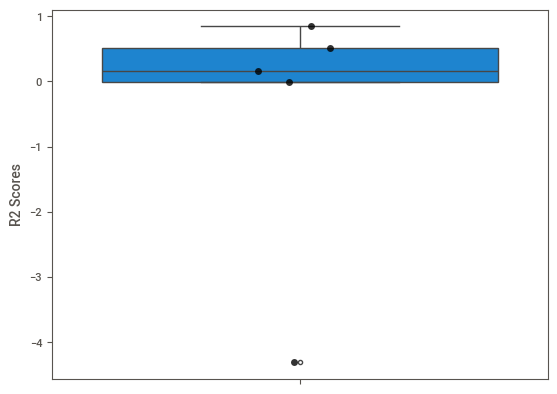

In [253]:
import seaborn as sns

data = pd.DataFrame(lin_scores, columns=['R2 Scores'])
boxplot = sns.boxplot(y="R2 Scores", data=data)
boxplot = sns.stripplot(y="R2 Scores", data=data, marker="o", alpha=0.8, color="black")

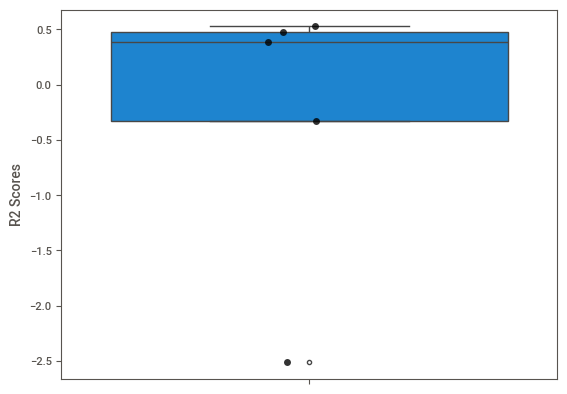

In [254]:
import seaborn as sns

data = pd.DataFrame(lin_scores_train, columns=['R2 Scores'])
boxplot = sns.boxplot(y="R2 Scores", data=data)
boxplot = sns.stripplot(y="R2 Scores", data=data, marker="o", alpha=0.8, color="black")

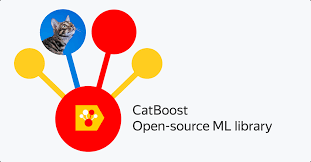

In [255]:
#Se trae el dataset a utilizar de nuevo
df_world = pd.read_csv("datos_economicos_mundiales_procesados.csv")
df_world.head()

,Unnamed: 0,Paises,Ingresos,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023,cluster
0,0,Angola,Ingreso mediano alto,22.366667,14.620,74.933333,7.726000,3
1,1,Albania,Países de ingreso bajo,0.372727,11.584,100.000000,9.833778,0
2,2,Argentina,Países de ingreso mediano bajo,2.539130,6.178,100.000000,12.284900,0
3,3,Armenia,Países de ingreso mediano bajo,3.043478,8.586,99.966667,9.684984,0
4,4,Australia,Países de ingreso bajo,0.575000,3.667,100.000000,13.545044,0


In [256]:
#Eliminamos la columna cluster
df_world.drop(columns='cluster',axis=1,inplace=True)

In [257]:
df_world.drop(columns='Unnamed: 0',axis=1,inplace=True)
df_world.head()

,Paises,Ingresos,Indice de Pobreza 2023,Porcentaje de Desempleo 2023,Porcentaje de Acceso a Electricidad 2023,Gasto Público 2023
0,Angola,Ingreso mediano alto,22.366667,14.620,74.933333,7.726000
1,Albania,Países de ingreso bajo,0.372727,11.584,100.000000,9.833778
2,Argentina,Países de ingreso mediano bajo,2.539130,6.178,100.000000,12.284900
3,Armenia,Países de ingreso mediano bajo,3.043478,8.586,99.966667,9.684984
4,Australia,Países de ingreso bajo,0.575000,3.667,100.000000,13.545044


In [258]:
#Separamos los datos y la variable target
X = df_world.drop('Indice de Pobreza 2023', axis=1)
y = df_world['Indice de Pobreza 2023']

In [259]:
print(X.dtypes)

Paises                                       object
Ingresos                                     object
Porcentaje de Desempleo 2023                float64
Porcentaje de Acceso a Electricidad 2023    float64
Gasto Público 2023                          float64
dtype: object


In [260]:
# Lista de columnas categoricas
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)

# Ubicacion de cada columna categorica
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['Paises', 'Ingresos']
Location of categorical columns :  [0, 1]


In [261]:
# Dividimos en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

print("Train data size:", X_train.shape)
print("Test data size:", X_test.shape)

Train data size: (31, 5)
Test data size: (21, 5)


In [262]:
!pip install catboost


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:
from catboost import Pool

# Creating pool object for train dataset. We give information of categorical features
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
# Creating pool object for test dataset
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [264]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(loss_function='RMSE')

#cat_model.fit(X_train, y_train, cat_features=cat_features, verbose=False)
cat_model.fit(train_data, verbose=False)

In [265]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

#### Importancia de cada feature en el modelo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4936\1590341996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance, palette="cool");


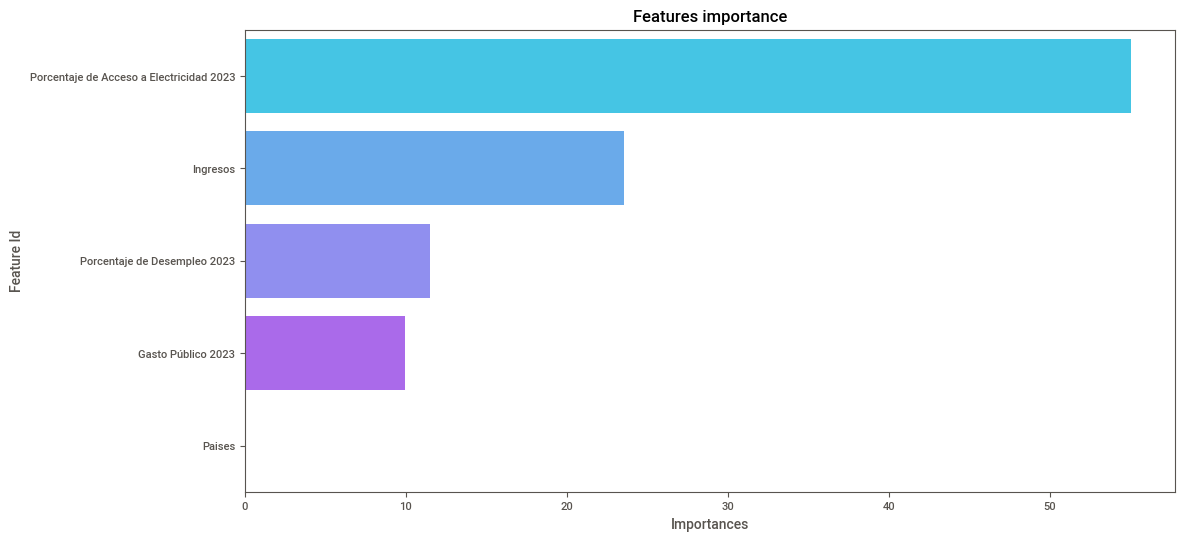

In [266]:
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance, palette="cool");
plt.title('Features importance');

In [271]:
# Definir la función para calcular el R² ajustado
def r2_adjusted_score(r2, X, y):
    n = X.shape[0]  # Número de muestras
    p = X.shape[1]  # Número de características/predictores
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return r2_adj

#### Evaluacion del modelo

In [272]:
y_pred = cat_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, y_pred)
catboost_rmse = np.sqrt(catboost_mse)
print("Test RMSE=", catboost_rmse)
r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
print("Test R2_adj=", r2_adjusted_score(r2, X_test, y_test))

Test RMSE= 18.000635947927922
Test R2= 0.325435512559588
Test R2_adj= 0.10058068341278414
